In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/gunnvantsaini/Data/Work/Python Trainings/PythonForModellers/Data/dm.csv")

In [3]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [4]:
### Trying to predict how much some one will spend
# Predict who will be spending more vs who will spending less
# Define high spender > avg(AmountSpent)

In [5]:
data['AmountSpent'].mean()

1216.77

In [8]:
data['Target']=data['AmountSpent'].map(lambda x: 1 if x>1216.77 else 0)

In [9]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1


In [10]:
data_m=data.drop(['AmountSpent','Cust_Id'],axis=1)

In [11]:
data_m.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1


In [12]:
### Age---> old-middle, young
### Children--->0-1, 1
### History----> NA--->NewCust

In [13]:
data_m['History']=data_m['History'].fillna("NewCust")

In [14]:
data_m['AgeN']=data_m['Age'].map(lambda x: 1 if x!='Young' else 0)

In [15]:
data_m['ChildrenN']=data_m['Children'].map(lambda x:1 if x<=1 else 0)

In [16]:
data_m.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Target,AgeN,ChildrenN
0,Old,Female,Own,Single,Far,47500,0,High,6,0,1,1
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1,1,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,0,0,1
3,Middle,Male,Own,Married,Close,85600,1,High,18,1,1,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1,1,1


In [19]:
train=data_m.sample(frac=0.70,random_state=200)

In [20]:
test=data_m.drop(train.index)

In [21]:
### Ready to model
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [22]:
formula="Target~Gender+OwnHome+Married+Location+Salary+AgeN+ChildrenN+History+Catalogs"
mod=smf.glm(formula,data=train,family=sm.families.Binomial()).fit()

In [23]:
print(mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      688
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -164.38
Date:                Wed, 17 Jul 2019   Deviance:                       328.76
Time:                        11:37:31   Pearson chi2:                     387.
No. Iterations:                    24   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -9.0632      1.312     -6.909      0.000     -11.634      -6.492
Gender[T.Male]         0.335

In [24]:
train['History_d']=train['History'].map(lambda x: 1 if x=='Medium' else 0)
test['History_d']=test['History'].map(lambda x: 1 if x=='Medium' else 0)

In [25]:
formula="Target~Location+History_d+Salary+AgeN+ChildrenN+Catalogs"

In [26]:
mod2=smf.glm(formula,data=train,family=sm.families.Binomial()).fit()

In [27]:
print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      693
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -198.58
Date:                Wed, 17 Jul 2019   Deviance:                       397.16
Time:                        11:44:31   Pearson chi2:                     819.
No. Iterations:                     7   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.8124      0.881    -12.269      0.000     -12.540      -9.085
Location[T.Far]     1.6664      0.311

In [28]:
##  Multicollinearity---->VIF

In [30]:
## ROC/AUC
probs=mod2.predict(train)

In [31]:
## AUC
import sklearn.metrics as metrics

In [32]:
metrics.roc_auc_score(train['Target'],probs)

0.9466205145362053

In [33]:
## ROC
fpr,tpr,thresholds=metrics.roc_curve(train['Target'],probs)

In [36]:
thresholds

array([1.99978711e+00, 9.99787114e-01, 9.91494738e-01, 9.91441960e-01,
       9.62747246e-01, 9.62715977e-01, 9.60731053e-01, 9.59349513e-01,
       9.02097198e-01, 8.99404328e-01, 8.98668074e-01, 8.95315391e-01,
       8.88740522e-01, 8.37875386e-01, 8.26585495e-01, 8.23146021e-01,
       8.21367459e-01, 8.08404207e-01, 8.02796030e-01, 8.02732487e-01,
       7.99987667e-01, 7.95875135e-01, 7.92887100e-01, 7.76391122e-01,
       7.75319069e-01, 7.50765597e-01, 7.49394419e-01, 7.24482401e-01,
       7.22995356e-01, 7.11061199e-01, 6.99729793e-01, 6.92050519e-01,
       6.88550444e-01, 6.84274230e-01, 6.78525775e-01, 6.77457796e-01,
       6.72662155e-01, 6.72513778e-01, 6.64483328e-01, 6.49260461e-01,
       6.43664936e-01, 6.24627019e-01, 6.02249034e-01, 5.98029649e-01,
       5.44416341e-01, 5.42543335e-01, 5.41003532e-01, 5.35393142e-01,
       5.18373224e-01, 5.14798742e-01, 4.98390458e-01, 4.96662201e-01,
       4.96081496e-01, 4.84799082e-01, 4.79938887e-01, 4.77257686e-01,
      

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

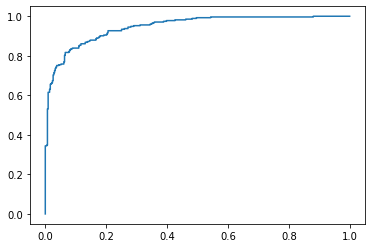

In [38]:
plt.plot(fpr,tpr,"-")